# Ejercicio 4 - Pokémon (reloaded)

## Carga de modulos

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cufflinks as cf
import re
import seaborn as sns

import cufflinks as cf
from sklearn import set_config
from sklearn import svm

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

#cf.go_offline()
pd.set_option('display.max_columns', 500)
# Environment setup
cf.go_offline()
set_config(display="diagram")

## Data Wrangling

### Carga de datos

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datos/pokemon.csv')

In [ ]:
display(df.head())

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0


### Feature engineering

In [ ]:
ls_disc = ['abilities', 'japanese_name', 'name','type1', 'type2', 'is_legendary', 'generation']

In [ ]:
df.drop('classfication',axis=1, inplace=True)
target = 'generation'
ls_cont = list(df.columns.drop(ls_disc))
ls_cont.remove('pokedex_number')

In [ ]:
# no funciona en colab, solo en jupyter
# for variable in ls_disc:
#  display(df[variable].iplot(kind="hist", theme="solar", title=f"Histogram for {variable}")

Histogram for  against_bug


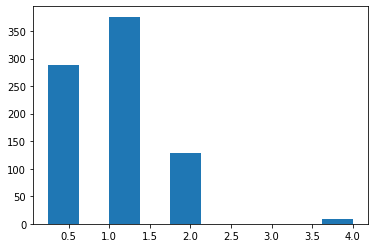

Histogram for  against_dark


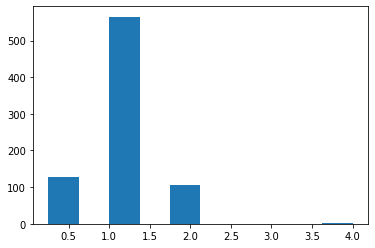

Histogram for  against_dragon


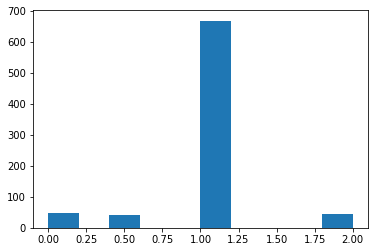

Histogram for  against_electric


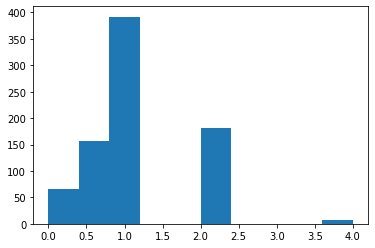

Histogram for  against_fairy


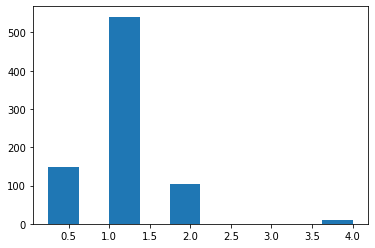

Histogram for  against_fight


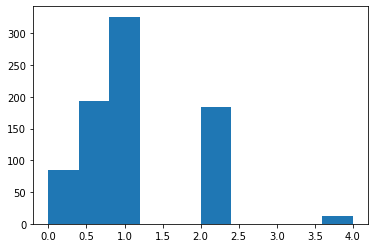

Histogram for  against_fire


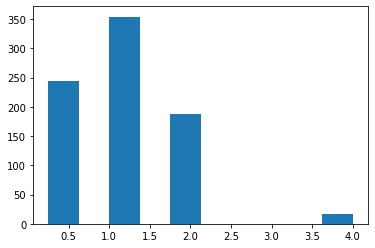

Histogram for  against_flying


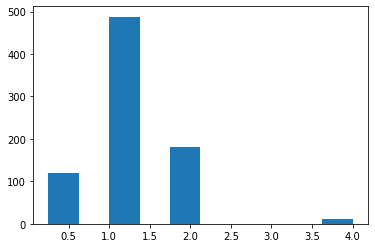

Histogram for  against_ghost


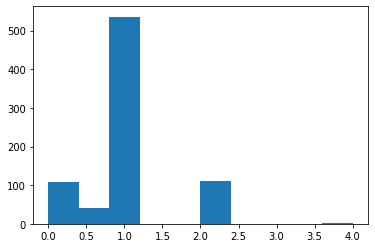

Histogram for  against_grass


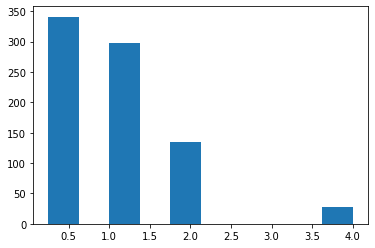

Histogram for  against_ground


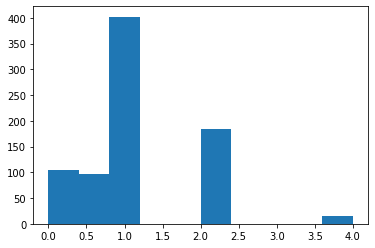

Histogram for  against_ice


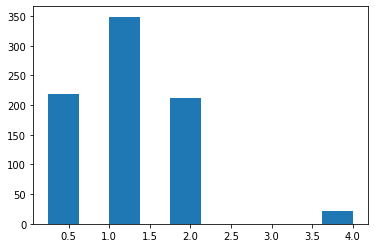

Histogram for  against_normal


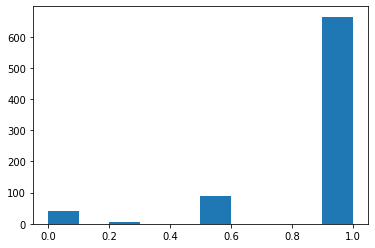

Histogram for  against_poison


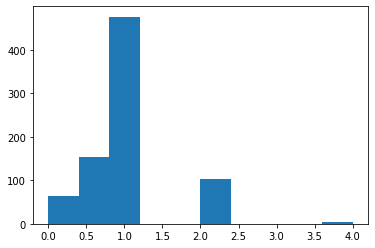

Histogram for  against_psychic


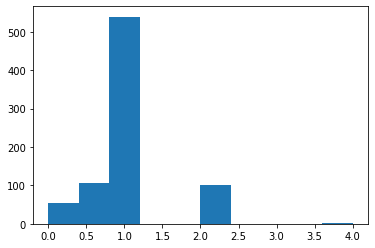

Histogram for  against_rock


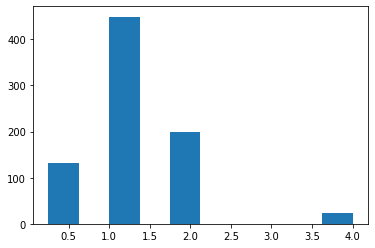

Histogram for  against_steel


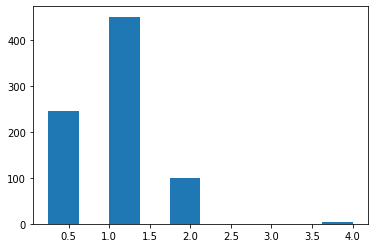

Histogram for  against_water


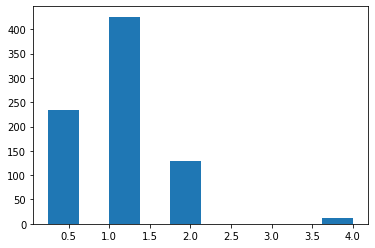

Histogram for  attack


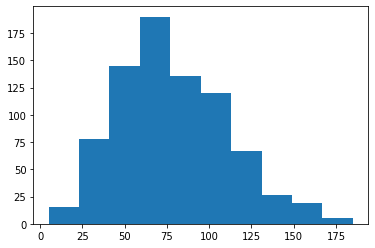

Histogram for  base_egg_steps


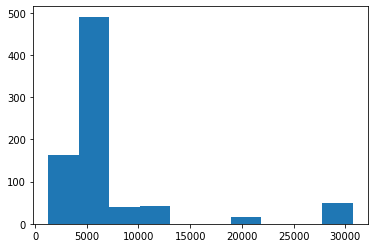

Histogram for  base_happiness


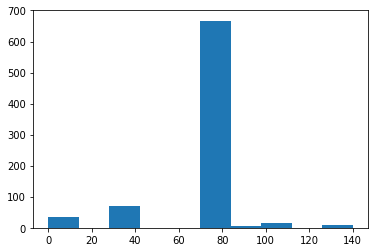

Histogram for  base_total


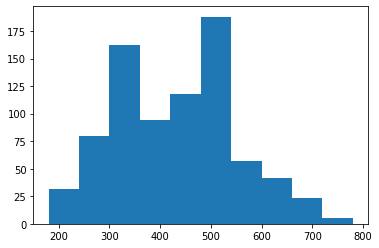

Histogram for  capture_rate


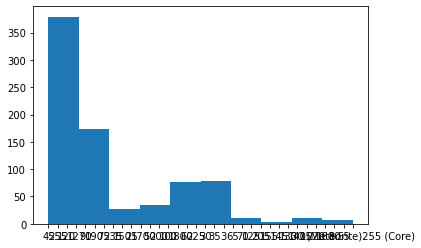

Histogram for  defense


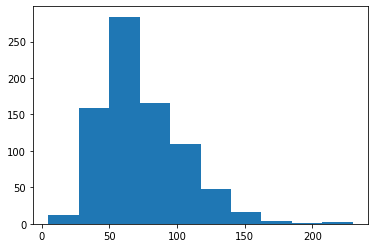

Histogram for  experience_growth


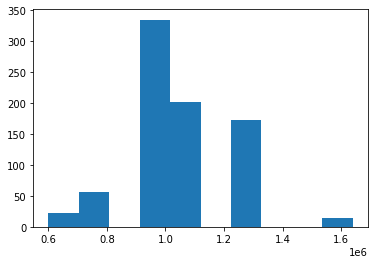

Histogram for  height_m


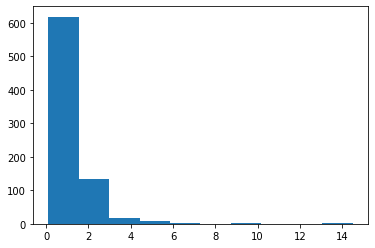

Histogram for  hp


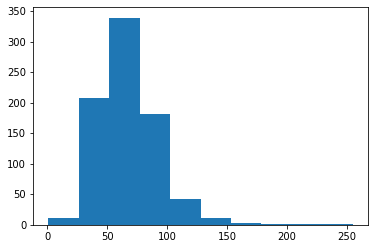

Histogram for  percentage_male


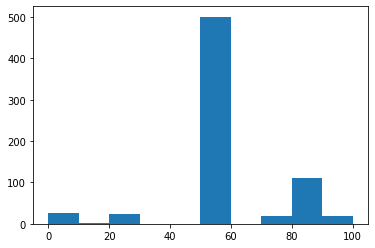

Histogram for  sp_attack


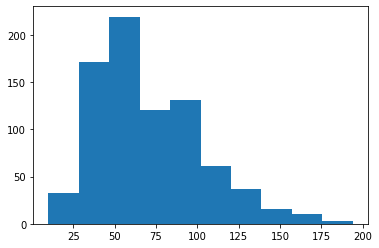

Histogram for  sp_defense


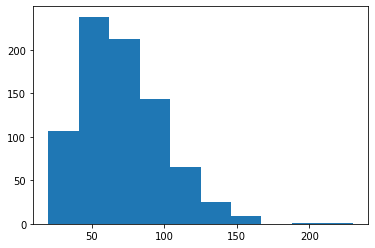

Histogram for  speed


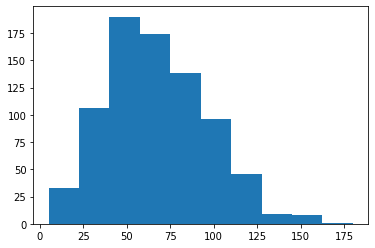

Histogram for  weight_kg


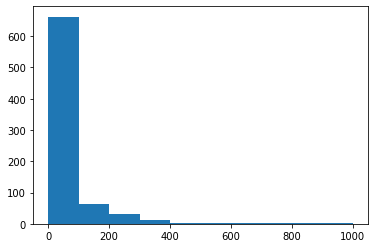

In [ ]:
# esta sí funciona en colab :)
for variable in ls_cont:
  print("Histogram for ",variable)
  plt.figure()
  plt.hist(df[variable])
  plt.show()

## EDA

### Imputación

In [ ]:
def input_missing(table, coldisc, colcont):
  for feature, missing in list(table.isna().mean().items()):
    if missing > 0 and missing < 0.35:
      if feature in colcont:
        table[feature]=table[feature].fillna(table[feature].mean())
      elif feature in coldisc:
        table[feature]=table[feature].fillna(table[feature].mode())
  display(table.isna().mean())

In [ ]:
df.isna().mean()

abilities            0.000000
against_bug          0.000000
against_dark         0.000000
against_dragon       0.000000
against_electric     0.000000
against_fairy        0.000000
against_fight        0.000000
against_fire         0.000000
against_flying       0.000000
against_ghost        0.000000
against_grass        0.000000
against_ground       0.000000
against_ice          0.000000
against_normal       0.000000
against_poison       0.000000
against_psychic      0.000000
against_rock         0.000000
against_steel        0.000000
against_water        0.000000
attack               0.000000
base_egg_steps       0.000000
base_happiness       0.000000
base_total           0.000000
capture_rate         0.000000
defense              0.000000
experience_growth    0.000000
height_m             0.024969
hp                   0.000000
japanese_name        0.000000
name                 0.000000
percentage_male      0.122347
pokedex_number       0.000000
sp_attack            0.000000
sp_defense

In [ ]:
input_missing(df, ls_disc, ls_cont)
# la columna type2 no se eliminará para más tarde unirla a las dummies de type1

abilities            0.000000
against_bug          0.000000
against_dark         0.000000
against_dragon       0.000000
against_electric     0.000000
against_fairy        0.000000
against_fight        0.000000
against_fire         0.000000
against_flying       0.000000
against_ghost        0.000000
against_grass        0.000000
against_ground       0.000000
against_ice          0.000000
against_normal       0.000000
against_poison       0.000000
against_psychic      0.000000
against_rock         0.000000
against_steel        0.000000
against_water        0.000000
attack               0.000000
base_egg_steps       0.000000
base_happiness       0.000000
base_total           0.000000
capture_rate         0.000000
defense              0.000000
experience_growth    0.000000
height_m             0.000000
hp                   0.000000
japanese_name        0.000000
name                 0.000000
percentage_male      0.000000
pokedex_number       0.000000
sp_attack            0.000000
sp_defense

### Outliers

In [ ]:
df[ls_cont].dtypes

against_bug          float64
against_dark         float64
against_dragon       float64
against_electric     float64
against_fairy        float64
against_fight        float64
against_fire         float64
against_flying       float64
against_ghost        float64
against_grass        float64
against_ground       float64
against_ice          float64
against_normal       float64
against_poison       float64
against_psychic      float64
against_rock         float64
against_steel        float64
against_water        float64
attack                 int64
base_egg_steps         int64
base_happiness         int64
base_total             int64
capture_rate          object
defense                int64
experience_growth      int64
height_m             float64
hp                     int64
percentage_male      float64
sp_attack              int64
sp_defense             int64
speed                  int64
weight_kg            float64
dtype: object

In [ ]:
df['capture_rate']=df['capture_rate'].replace('30 (Meteorite)255 (Core)', '30')
df['capture_rate'] = df['capture_rate'].astype(int)

In [ ]:
df[ls_cont].describe(percentiles=[0.95, 0.99])

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,percentage_male,sp_attack,sp_defense,speed,weight_kg
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,8.010000e+02,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,1.098002,1.208177,0.887016,0.975343,1.005306,1.250312,0.983458,1.058365,77.857678,7191.011236,65.362047,428.377029,98.675406,73.008739,1.054996e+06,1.163892,68.958801,55.155761,71.305868,70.911361,66.334582,61.378105
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,0.738818,0.735356,0.266106,0.549375,0.495183,0.697148,0.500117,0.606562,32.158820,6558.220422,19.598948,119.203577,76.248866,30.769159,1.602558e+05,1.066737,26.576015,18.980069,32.353826,27.942501,28.907662,107.979179
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,0.000000,0.250000,0.000000,0.000000,0.000000,0.250000,0.250000,0.250000,5.000000,1280.000000,0.000000,180.000000,3.000000,5.000000,6.000000e+05,0.100000,1.000000,0.000000,10.000000,20.000000,5.000000,0.100000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,75.000000,5120.000000,70.000000,435.000000,60.000000,70.000000,1.000000e+06,1.000000,65.000000,50.000000,65.000000,66.000000,65.000000,28.500000
95%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,135.000000,30720.000000,70.000000,618.000000,255.000000,130.000000,1.250000e+06,2.400000,110.000000,88.100000,131.000000,120.000000,115.000000,230.000000
99%,2.000000,2.000000,2.000000,2.000000,4.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,2.000000,4.000000,2.000000,4.000000,164.000000,30720.000000,140.000000,700.000000,255.000000,160.000000,1.640000e+06,5.500000,150.000000,100.000000,165.000000,150.000000,145.000000,505.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,185.000000,30720.000000,140.000000,780.000000,255.000000,230.000000,1.640000e+06,14.500000,255.000000,100.000000,194.000000,230.000000,180.000000,999.900000


In [ ]:
outl = {var: df[var].quantile(0.99) for var in ls_cont}
outl

{'against_bug': 2.0,
 'against_dark': 2.0,
 'against_dragon': 2.0,
 'against_electric': 2.0,
 'against_fairy': 4.0,
 'against_fight': 4.0,
 'against_fire': 4.0,
 'against_flying': 4.0,
 'against_ghost': 2.0,
 'against_grass': 4.0,
 'against_ground': 4.0,
 'against_ice': 4.0,
 'against_normal': 1.0,
 'against_poison': 2.0,
 'against_psychic': 2.0,
 'against_rock': 4.0,
 'against_steel': 2.0,
 'against_water': 4.0,
 'attack': 164.0,
 'base_egg_steps': 30720.0,
 'base_happiness': 140.0,
 'base_total': 700.0,
 'capture_rate': 255.0,
 'defense': 160.0,
 'experience_growth': 1640000.0,
 'height_m': 5.5,
 'hp': 150.0,
 'percentage_male': 100.0,
 'sp_attack': 165.0,
 'sp_defense': 150.0,
 'speed': 145.0,
 'weight_kg': 505.0}

In [ ]:
df1 = df.copy()

In [ ]:
for var in ls_cont:
    df1 = df1[df1[var]<=outl[var]]
df1.reset_index(inplace=True,drop=True)

In [ ]:
df1[ls_disc+ls_cont].nunique().sort_values()

is_legendary           2
against_normal         4
against_ghost          4
against_dark           4
against_bug            4
against_dragon         4
against_steel          4
against_rock           5
against_water          5
against_poison         5
against_electric       5
against_fairy          5
against_psychic        5
against_fire           5
against_flying         5
against_grass          5
against_ice            5
base_happiness         6
experience_growth      6
against_ground         6
against_fight          6
generation             7
percentage_male        8
base_egg_steps        10
type2                 18
type1                 18
capture_rate          33
height_m              39
sp_defense            89
hp                    90
defense              100
sp_attack            103
attack               104
speed                108
base_total           194
weight_kg            383
abilities            440
japanese_name        724
name                 724
dtype: int64

### Generar dummies

#### Dummies para pokémones que tengan más de una habilidad

In [ ]:
all_abilities=[]
for ab in df1['abilities']:
  indv_abilities = re.findall("([^,\'\[\]]+)",ab)
  for i_ab in indv_abilities:
      if i_ab not in all_abilities:
          all_abilities.append(i_ab)
all_abilities.remove(' ')

In [ ]:
dum_ab = pd.DataFrame(0, index=np.arange(df1['abilities'].shape[0]),columns=all_abilities)
for i in range(df1['abilities'].shape[0]):
  for ab in all_abilities:
    if ab in df1['abilities'][i]:
      dum_ab[ab][i] = 1
dum_ab.columns=['ab_'+x.replace(" ", "").lower() for x in dum_ab.columns]

#### Dummies para pokémones que tengan más de un tipo

In [ ]:
for i in range(df1.shape[0]):
  if df1['type1'][i]==df1['type2'][i]:
    df1['type2'][i]=None
dumtyp1=pd.get_dummies(df1['type1'])
dumtyp2=pd.get_dummies(df1['type2'])

In [ ]:
dum_type=dumtyp1.add(dumtyp2, fill_value=0)
dum_type.columns = ['type_'+x for x in dum_type.columns]

#### Otras dummies




In [ ]:
dum_leg = pd.get_dummies(df1['is_legendary'])
dum_leg.columns = ['not_legendary', 'legendary']

In [ ]:
df1 = df1.join(dum_ab).join(dum_type).join(dum_leg)
df1.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,ab_overgrow,ab_chlorophyll,ab_blaze,ab_solarpower,ab_torrent,ab_raindish,ab_shielddust,ab_runaway,ab_shedskin,ab_compoundeyes,ab_tintedlens,ab_swarm,ab_sniper,ab_keeneye,ab_tangledfeet,ab_bigpecks,ab_guts,ab_hustle,ab_gluttony,ab_thickfat,ab_intimidate,ab_unnerve,ab_static,ab_lightningrod,ab_surgesurfer,ab_sandveil,ab_sandrush,ab_snowcloak,ab_slushrush,ab_poisonpoint,ab_rivalry,ab_sheerforce,ab_cutecharm,ab_magicguard,ab_friendguard,ab_unaware,ab_flashfire,ab_drought,ab_snowwarning,ab_competitive,ab_frisk,ab_innerfocus,ab_infiltrator,ab_stench,ab_effectspore,ab_dryskin,ab_damp,ab_wonderskin,ab_arenatrap,ab_sandforce,ab_tanglinghair,ab_pickup,ab_technician,ab_rattled,ab_limber,ab_furcoat,ab_cloudnine,ab_swiftswim,ab_vitalspirit,ab_angerpoint,ab_defiant,ab_justified,ab_waterabsorb,ab_synchronize,ab_noguard,ab_steadfast,ab_clearbody,ab_liquidooze,ab_rockhead,ab_sturdy,ab_magnetpull,ab_galvanize,ab_flamebody,ab_oblivious,ab_owntempo,ab_regenerator,ab_analytic,ab_earlybird,ab_hydration,ab_icebody,ab_stickyhold,ab_poisontouch,ab_powerofalchemy,ab_shellarmor,ab_skilllink,ab_overcoat,ab_levitate,ab_insomnia,ab_forewarn,ab_hypercutter,ab_soundproof,ab_aftermath,ab_battlearmor,ab_cursedbody,ab_reckless,ab_unburden,ab_ironfist,ab_leafguard,ab_scrappy,ab_waterveil,ab_illuminate,ab_naturalcure,ab_filter,ab_moldbreaker,ab_moxie,ab_imposter,ab_adaptability,ab_anticipation,ab_voltabsorb,ab_quickfeet,ab_trace,ab_download,ab_weakarmor,ab_pressure,ab_marvelscale,ab_multiscale,ab_serenegrace,ab_superluck,ab_magicbounce,ab_plus,ab_healer,ab_hugepower,ab_sapsipper,ab_drizzle,ab_speedboost,ab_prankster,ab_immunity,ab_lightmetal,ab_pickpocket,ab_honeygather,ab_magmaarmor,ab_moody,ab_suctioncups,ab_sandstream,ab_telepathy,ab_poisonheal,ab_truant,ab_wonderguard,ab_normalize,ab_stall,ab_heavymetal,ab_purepower,ab_minus,ab_roughskin,ab_simple,ab_solidrock,ab_whitesmoke,ab_contrary,ab_toxicboost,ab_stormdrain,ab_forecast,ab_colorchange,ab_protean,ab_harvest,ab_shadowtag,ab_flowergift,ab_flareboost,ab_klutz,ab_heatproof,ab_motordrive,ab_slowstart,ab_baddreams,ab_victorystar,ab_zenmode,ab_mummy,ab_defeatist,ab_illusion,ab_ironbarbs,ab_turboblaze,ab_teravolt,ab_bulletproof,ab_magician,ab_battlebond,ab_cheekpouch,ab_galewings,ab_flowerveil,ab_symbiosis,ab_grasspelt,ab_stancechange,ab_aromaveil,ab_sweetveil,ab_toughclaws,ab_megalauncher,ab_strongjaw,ab_pixilate,ab_gooey,ab_fairyaura,ab_longreach,ab_liquidvoice,ab_stakeout,ab_battery,ab_dancer,ab_schooling,ab_merciless,ab_stamina,ab_waterbubble,ab_corrosion,ab_fluffy,ab_queenlymajesty,ab_triage,ab_receiver,ab_wimpout,ab_emergencyexit,ab_watercompaction,ab_innardsout,ab_rkssystem,ab_shieldsdown,ab_comatose,ab_disguise,ab_dazzling,ab_berserk,ab_steelworker,ab_electricsurge,ab_psychicsurge,ab_mistysurge,ab_fullmetalbody,ab_beastboost,ab_prismarmor,ab_soul-heart,type_bug,type_dark,type_dragon,type_electric,type_fairy,type_fighting,type_fire,type_flying,type_ghost,type_grass,type_ground,type_ice,type_normal,type_poison,type_psychic,type_rock,type_steel,type_water,not_legendary,legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

## Dividir conjunto de datos

In [ ]:
X = df1[df1.columns.drop(ls_disc+['pokedex_number'])]

In [ ]:
y = df1[target]

In [ ]:
X.join(y)

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,percentage_male,sp_attack,sp_defense,speed,weight_kg,ab_overgrow,ab_chlorophyll,ab_blaze,ab_solarpower,ab_torrent,ab_raindish,ab_shielddust,ab_runaway,ab_shedskin,ab_compoundeyes,ab_tintedlens,ab_swarm,ab_sniper,ab_keeneye,ab_tangledfeet,ab_bigpecks,ab_guts,ab_hustle,ab_gluttony,ab_thickfat,ab_intimidate,ab_unnerve,ab_static,ab_lightningrod,ab_surgesurfer,ab_sandveil,ab_sandrush,ab_snowcloak,ab_slushrush,ab_poisonpoint,ab_rivalry,ab_sheerforce,ab_cutecharm,ab_magicguard,ab_friendguard,ab_unaware,ab_flashfire,ab_drought,ab_snowwarning,ab_competitive,ab_frisk,ab_innerfocus,ab_infiltrator,ab_stench,ab_effectspore,ab_dryskin,ab_damp,ab_wonderskin,ab_arenatrap,ab_sandforce,ab_tanglinghair,ab_pickup,ab_technician,ab_rattled,ab_limber,ab_furcoat,ab_cloudnine,ab_swiftswim,ab_vitalspirit,ab_angerpoint,ab_defiant,ab_justified,ab_waterabsorb,ab_synchronize,ab_noguard,ab_steadfast,ab_clearbody,ab_liquidooze,ab_rockhead,ab_sturdy,ab_magnetpull,ab_galvanize,ab_flamebody,ab_oblivious,ab_owntempo,ab_regenerator,ab_analytic,ab_earlybird,ab_hydration,ab_icebody,ab_stickyhold,ab_poisontouch,ab_powerofalchemy,ab_shellarmor,ab_skilllink,ab_overcoat,ab_levitate,ab_insomnia,ab_forewarn,ab_hypercutter,ab_soundproof,ab_aftermath,ab_battlearmor,ab_cursedbody,ab_reckless,ab_unburden,ab_ironfist,ab_leafguard,ab_scrappy,ab_waterveil,ab_illuminate,ab_naturalcure,ab_filter,ab_moldbreaker,ab_moxie,ab_imposter,ab_adaptability,ab_anticipation,ab_voltabsorb,ab_quickfeet,ab_trace,ab_download,ab_weakarmor,ab_pressure,ab_marvelscale,ab_multiscale,ab_serenegrace,ab_superluck,ab_magicbounce,ab_plus,ab_healer,ab_hugepower,ab_sapsipper,ab_drizzle,ab_speedboost,ab_prankster,ab_immunity,ab_lightmetal,ab_pickpocket,ab_honeygather,ab_magmaarmor,ab_moody,ab_suctioncups,ab_sandstream,ab_telepathy,ab_poisonheal,ab_truant,ab_wonderguard,ab_normalize,ab_stall,ab_heavymetal,ab_purepower,ab_minus,ab_roughskin,ab_simple,ab_solidrock,ab_whitesmoke,ab_contrary,ab_toxicboost,ab_stormdrain,ab_forecast,ab_colorchange,ab_protean,ab_harvest,ab_shadowtag,ab_flowergift,ab_flareboost,ab_klutz,ab_heatproof,ab_motordrive,ab_slowstart,ab_baddreams,ab_victorystar,ab_zenmode,ab_mummy,ab_defeatist,ab_illusion,ab_ironbarbs,ab_turboblaze,ab_teravolt,ab_bulletproof,ab_magician,ab_battlebond,ab_cheekpouch,ab_galewings,ab_flowerveil,ab_symbiosis,ab_grasspelt,ab_stancechange,ab_aromaveil,ab_sweetveil,ab_toughclaws,ab_megalauncher,ab_strongjaw,ab_pixilate,ab_gooey,ab_fairyaura,ab_longreach,ab_liquidvoice,ab_stakeout,ab_battery,ab_dancer,ab_schooling,ab_merciless,ab_stamina,ab_waterbubble,ab_corrosion,ab_fluffy,ab_queenlymajesty,ab_triage,ab_receiver,ab_wimpout,ab_emergencyexit,ab_watercompaction,ab_innardsout,ab_rkssystem,ab_shieldsdown,ab_comatose,ab_disguise,ab_dazzling,ab_berserk,ab_steelworker,ab_electricsurge,ab_psychicsurge,ab_mistysurge,ab_fullmetalbody,ab_beastboost,ab_prismarmor,ab_soul-heart,type_bug,type_dark,type_dragon,type_electric,type_fairy,type_fighting,type_fire,type_flying,type_ghost,type_grass,type_ground,type_ice,type_normal,type_poison,type_psychic,type_rock,type_steel,type_water,not_legendary,legendary,generation
0,1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.00,2.00,1.0,1.0,0.5,49,5120,70,318,45,49,1059860,0.7,45,88.100000,65,65,45,6.9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
X_train

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,percentage_male,sp_attack,sp_defense,speed,weight_kg,ab_overgrow,ab_chlorophyll,ab_blaze,ab_solarpower,ab_torrent,ab_raindish,ab_shielddust,ab_runaway,ab_shedskin,ab_compoundeyes,ab_tintedlens,ab_swarm,ab_sniper,ab_keeneye,ab_tangledfeet,ab_bigpecks,ab_guts,ab_hustle,ab_gluttony,ab_thickfat,ab_intimidate,ab_unnerve,ab_static,ab_lightningrod,ab_surgesurfer,ab_sandveil,ab_sandrush,ab_snowcloak,ab_slushrush,ab_poisonpoint,ab_rivalry,ab_sheerforce,ab_cutecharm,ab_magicguard,ab_friendguard,ab_unaware,ab_flashfire,ab_drought,ab_snowwarning,ab_competitive,ab_frisk,ab_innerfocus,ab_infiltrator,ab_stench,ab_effectspore,ab_dryskin,ab_damp,ab_wonderskin,ab_arenatrap,ab_sandforce,ab_tanglinghair,ab_pickup,ab_technician,ab_rattled,ab_limber,ab_furcoat,ab_cloudnine,ab_swiftswim,ab_vitalspirit,ab_angerpoint,ab_defiant,ab_justified,ab_waterabsorb,ab_synchronize,ab_noguard,ab_steadfast,ab_clearbody,ab_liquidooze,ab_rockhead,ab_sturdy,ab_magnetpull,ab_galvanize,ab_flamebody,ab_oblivious,ab_owntempo,ab_regenerator,ab_analytic,ab_earlybird,ab_hydration,ab_icebody,ab_stickyhold,ab_poisontouch,ab_powerofalchemy,ab_shellarmor,ab_skilllink,ab_overcoat,ab_levitate,ab_insomnia,ab_forewarn,ab_hypercutter,ab_soundproof,ab_aftermath,ab_battlearmor,ab_cursedbody,ab_reckless,ab_unburden,ab_ironfist,ab_leafguard,ab_scrappy,ab_waterveil,ab_illuminate,ab_naturalcure,ab_filter,ab_moldbreaker,ab_moxie,ab_imposter,ab_adaptability,ab_anticipation,ab_voltabsorb,ab_quickfeet,ab_trace,ab_download,ab_weakarmor,ab_pressure,ab_marvelscale,ab_multiscale,ab_serenegrace,ab_superluck,ab_magicbounce,ab_plus,ab_healer,ab_hugepower,ab_sapsipper,ab_drizzle,ab_speedboost,ab_prankster,ab_immunity,ab_lightmetal,ab_pickpocket,ab_honeygather,ab_magmaarmor,ab_moody,ab_suctioncups,ab_sandstream,ab_telepathy,ab_poisonheal,ab_truant,ab_wonderguard,ab_normalize,ab_stall,ab_heavymetal,ab_purepower,ab_minus,ab_roughskin,ab_simple,ab_solidrock,ab_whitesmoke,ab_contrary,ab_toxicboost,ab_stormdrain,ab_forecast,ab_colorchange,ab_protean,ab_harvest,ab_shadowtag,ab_flowergift,ab_flareboost,ab_klutz,ab_heatproof,ab_motordrive,ab_slowstart,ab_baddreams,ab_victorystar,ab_zenmode,ab_mummy,ab_defeatist,ab_illusion,ab_ironbarbs,ab_turboblaze,ab_teravolt,ab_bulletproof,ab_magician,ab_battlebond,ab_cheekpouch,ab_galewings,ab_flowerveil,ab_symbiosis,ab_grasspelt,ab_stancechange,ab_aromaveil,ab_sweetveil,ab_toughclaws,ab_megalauncher,ab_strongjaw,ab_pixilate,ab_gooey,ab_fairyaura,ab_longreach,ab_liquidvoice,ab_stakeout,ab_battery,ab_dancer,ab_schooling,ab_merciless,ab_stamina,ab_waterbubble,ab_corrosion,ab_fluffy,ab_queenlymajesty,ab_triage,ab_receiver,ab_wimpout,ab_emergencyexit,ab_watercompaction,ab_innardsout,ab_rkssystem,ab_shieldsdown,ab_comatose,ab_disguise,ab_dazzling,ab_berserk,ab_steelworker,ab_electricsurge,ab_psychicsurge,ab_mistysurge,ab_fullmetalbody,ab_beastboost,ab_prismarmor,ab_soul-heart,type_bug,type_dark,type_dragon,type_electric,type_fairy,type_fighting,type_fire,type_flying,type_ghost,type_grass,type_ground,type_ice,type_normal,type_poison,type_psychic,type_rock,type_steel,type_water,not_legendary,legendary
466,1.0,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.0,1.0,0.5,1.0,1.0,1.0,1.0,0.5,0.5,98,5120,70,498,75,63,1000000,1.000000,75,88.100000,98,63,101,29.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [ ]:
y_train

466    5
91     1
138    2
258    3
348    4
      ..
718    7
375    4
27     1
100    1
590    5
Name: generation, Length: 543, dtype: int64

#Regresión logística

In [ ]:
logreg = LogisticRegression()

In [ ]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [ ]:
scaler.fit(X_test)

StandardScaler()

In [ ]:
model = LogisticRegression(max_iter=10000)

In [ ]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
train_acc = model.score(X_train, y_train)
train_acc

0.20441988950276244

In [ ]:
X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



In [ ]:
test_acc = accuracy_score(y_test, y_pred)
test_acc

0.18232044198895028

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.19      0.73      0.31        30
           2       0.22      0.21      0.21        24
           3       0.25      0.03      0.06        30
           4       0.20      0.08      0.11        25
           5       0.00      0.00      0.00        41
           6       0.00      0.00      0.00        17
           7       0.11      0.21      0.15        14

    accuracy                           0.18       181
   macro avg       0.14      0.18      0.12       181
weighted avg       0.14      0.18      0.12       181



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



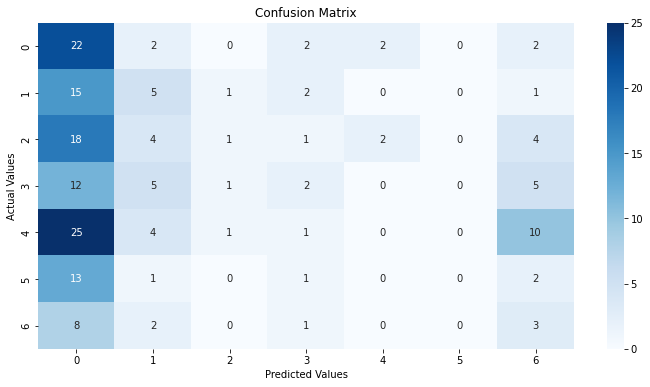

In [ ]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')